In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import json

In [2]:
def approx_eq(a, b):
    return abs(a - b) < .0001

In [3]:
class EulerCauchy:
    def __init__(self, coefficients=np.zeros(3)):
        self.coefficients = coefficients
    
    def m(self): # homogenous solution:
        m_poly = np.poly1d(0)
        for i, coefficient in enumerate(self.coefficients):
            poly = 1
            for i in range(0,len(self.coefficients)-1-i):
                poly *= np.poly1d([1,-i])
            m_poly += poly * coefficient
        return np.roots(m_poly)
        
    def roots(self):
        roots = {} # elements in form of {"m":i} where i is the number of repetitions of the root
        m_vals = self.m()
        for m_val in m_vals:
            matches = [root for root in roots.keys() if approx_eq(root, m_val) or approx_eq(root, np.conjugate(m_val))]
            if matches:
                roots[matches[0]] += 1
            else:
                roots[m_val] = 1
        return roots

    def y(self, x):
        y = 0
        i = 0
        roots = self.roots()
        for root in roots.keys():
            if root.imag:
                for n_rep in range(0, roots[root], 2):
                    y += (math.log(x) ** n_rep) * (x ** root.real) * (self.constants[i] * math.cos(root.imag * math.log(x)) 
                                                                      + self.constants[i+1] * math.sin(root.imag * math.log(x)))
                i += 2
            else:
                for n_rep in range(roots[root]):
                    y += self.constants[i] * (math.log(x) ** n_rep) * (x ** root)
                i += 1
        return float(y)

class ConstantCoefficients:
    def __init__(self, coefficients=np.zeros(3)):
        self.coefficients = coefficients

    def lbda(self):
        return np.roots(self.coefficients)
        
    def roots(self):
        roots = {} # elements in form of {"m":i} where i is the number of repetitions of the root
        lbda_vals = self.lbda()
        for lbda_val in lbda_vals:
            matches = [root for root in roots.keys() if approx_eq(root, lbda_val) or approx_eq(root, np.conjugate(lbda_val))]
            if matches:
                roots[matches[0]] += 1
            else:
                roots[lbda_val] = 1
        return roots
    
    def y(self, x):
        y = 0
        i = 0
        roots = self.roots()
        for root in roots.keys():
            if root.imag:
                for n_rep in range(0, roots[root], 2):
                    y += (x ** n_rep) * (math.e ** (root.real * x)) * (self.constants[i] * math.cos(root.imag * x) 
                                                                      + self.constants[i+1] * math.sin(root.imag * x))
                i += 2
            else:
                for n_rep in range(roots[root]):
                    y += self.constants[i] * (x ** n_rep) * (math.e ** (root.real * x))
                i += 1
        return float(y)

In [4]:
def normalize(values):
    return (values - np.min(values)) / (np.max(values) - np.min(values)) * 255

def valuemap(constants):
    i = constants['type']
    coefficients = constants['coefficients']
    eq = EulerCauchy(coefficients) if i else ConstantCoefficients(coefficients)
    eq.constants = constants['constants']
    return np.array(list(map(eq.y, np.arange(1,181))))

In [5]:
from PIL import Image
image = np.asarray(Image.open('test2.jpeg'), dtype=float)

In [6]:
def generate_image(rx, gx, bx, ry, gy, by):
    rx = normalize(sum(valuemap(_) for _ in rx))
    gx = normalize(sum(valuemap(_) for _ in gx))
    bx = normalize(sum(valuemap(_) for _ in bx))
    ry = normalize(sum(valuemap(_) for _ in ry))
    gy = normalize(sum(valuemap(_) for _ in gy))
    by = normalize(sum(valuemap(_) for _ in by))

    x_values = np.stack([rx, gx, bx]).T
    y_values = np.stack([ry, gy, by]).T
    
    x_values = np.repeat(x_values[:,np.newaxis,:], 180, axis=1)
    y_values = np.repeat(y_values[np.newaxis,:,:], 180, axis=0)
    return ((x_values + y_values) / 2).astype(np.uint8)

In [7]:
def flatten(xss):
    return [x for xs in xss for x in xs]

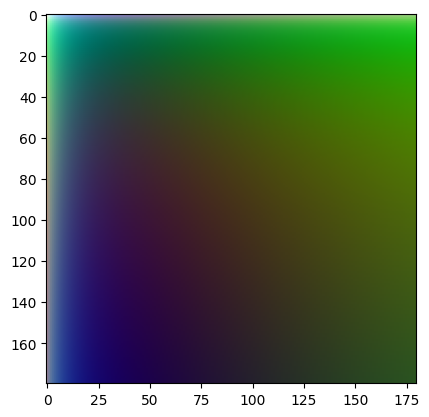

In [21]:
constants = ([
    {
        'type': 1,
        'coefficients': np.random.rand(3) * 10,
        'constants': np.random.rand(3),
    } for _ in range(5)
] for _ in range(6))

generated_image = generate_image(*constants)
plt.imshow(generated_image)

In [ ]:
accuracies = {}

while True:
    constants = ([
        {
            'type': 1,
            'coefficients': np.random.rand(3) * 10,
            'constants': np.random.rand(3),
        } for _ in range(5)
    ] for _ in range(6))

    generated_image = generate_image(*constants)
    mse = np.sum((image - generated_image) ** 2)

    accuracies[mse] = constants
    accuracies = dict(sorted(accuracies.items()))
    plt.imsave('output.jpeg', generated_image, cmap='gray')
    print(list(accuracies.keys())[0])
    
    # combined_x_constants = flatten([constant[0] for constant in lowest_mse.values()])
    # combined_y_constants = flatten([constant[1] for constant in lowest_mse.values()])
    # combined_image = generate_image(combined_x_constants, combined_y_constants)
    # combined_mse = np.sum((combined_image-image) ** 2)

    # if combined_mse in lowest_mse.keys():
    #     continue

    # for key in lowest_mse.keys():
    #     if combined_mse < key:
    #         lowest_mse.popitem()
    #         lowest_mse[combined_mse] = (combined_x_constants, combined_y_constants)
    #         lowest_mse = dict(sorted(lowest_mse.items()))
    #         print(lowest_mse.keys())
    #         break

816184222.0
816184222.0
816184222.0
816184222.0
785371329.0
785371329.0
537214974.0
537214974.0
537214974.0
480712098.0
480712098.0
480712098.0
480712098.0
480712098.0
480712098.0
480712098.0
480712098.0
480712098.0
480712098.0
480712098.0
480712098.0
480712098.0
480712098.0
480712098.0
480712098.0
480712098.0
480712098.0
480712098.0
480712098.0
480712098.0
480712098.0
480712098.0
480712098.0
480712098.0
480712098.0
480712098.0
480712098.0
480712098.0
480712098.0
480712098.0
480712098.0
480712098.0
480712098.0
380855244.0
380855244.0
380855244.0
380855244.0
380855244.0
380855244.0
380855244.0
380855244.0
380855244.0
380855244.0
380855244.0
380855244.0
380855244.0
380855244.0
380855244.0
380855244.0
380855244.0
380855244.0
380855244.0
380855244.0
380855244.0
380855244.0
380855244.0
380855244.0
380855244.0
380855244.0
380855244.0
380855244.0
380855244.0
347536666.0
347536666.0
347536666.0
347536666.0
347536666.0
347536666.0
347536666.0
347536666.0
347536666.0
347536666.0
347536666.0
3475

KeyboardInterrupt: 

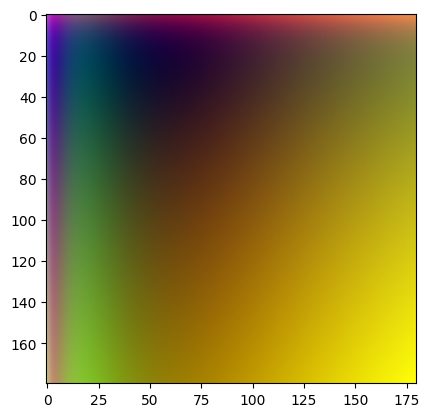

In [11]:
constants = list(accuracies.values())[0]
plt.imshow(generate_image(*constants), cmap='gray')

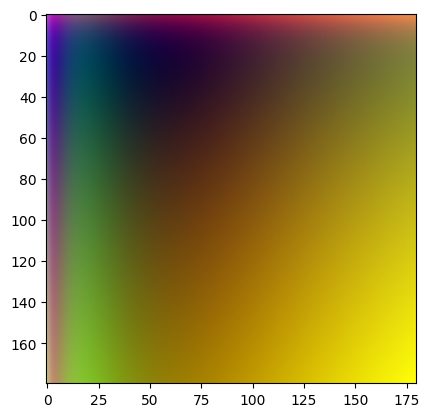

In [18]:
random_images = list(accuracies.values())[0:1]
# combined_x_constants = flatten([constant[0] for constant in lowest_mse.values()])
# combined_y_constants = flatten([constant[1] for constant in lowest_mse.values()])
combined_image = np.zeros((180,180,3))
for im in random_images:
    combined_image += generate_image(*im)
combined_image /= len(random_images)
combined_mse = np.sum((combined_image-image) ** 2)
plt.imshow(combined_image.astype(int), cmap='gray')